In [1]:
import os, sys
import tensorflow as tf
import tensorflow.contrib.slim as slim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pprint import pprint
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# cloning model from git

git clone https://github.com/tensorflow/models

# getting pretrained params of VGG-16

http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz

# Test Image

In [3]:
os.chdir('C:/Users/YISS/Desktop/Y_BIGTA/VISION_project/dataset/test_data')

In [4]:
os.getcwd()

'C:\\Users\\YISS\\Desktop\\Y_BIGTA\\VISION_project\\dataset\\test_data'

In [5]:
test_image1 = 'test5.jpg'

In [6]:
img = Image.open(test_image1)
img_resized = img.resize((224,224))
img = np.asarray(img)[:,:,:3]
img_resized = np.asarray(img_resized)[:,:,:3]
print(img.shape, img_resized.shape)

(480, 640, 3) (224, 224, 3)


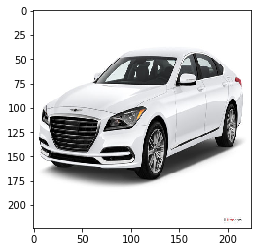

In [7]:
img_resized = img_resized.astype(np.float32)
plt.imshow(img_resized / 255)

# path

In [8]:
print(os.getcwd())

C:\Users\YISS\Desktop\Y_BIGTA\VISION_project\dataset\test_data


In [9]:
pprint(sys.path)

['C:\\Users\\YISS\\Anaconda3\\python36.zip',
 'C:\\Users\\YISS\\Anaconda3\\DLLs',
 'C:\\Users\\YISS\\Anaconda3\\lib',
 'C:\\Users\\YISS\\Anaconda3',
 '',
 'C:\\Users\\YISS\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\YISS\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\YISS\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\YISS\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\YISS\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\YISS\\.ipython']


sys.path.append : appending path

In [10]:
sys.path.append('C:/Users/YISS/Desktop/git/models/research/slim')
pprint(sys.path)

['C:\\Users\\YISS\\Anaconda3\\python36.zip',
 'C:\\Users\\YISS\\Anaconda3\\DLLs',
 'C:\\Users\\YISS\\Anaconda3\\lib',
 'C:\\Users\\YISS\\Anaconda3',
 '',
 'C:\\Users\\YISS\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\YISS\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\YISS\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\YISS\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\YISS\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\YISS\\.ipython',
 'C:/Users/YISS/Desktop/git/models/research/slim']


In [11]:
from datasets import imagenet
from nets import vgg

# dataset

In [12]:
label_table = imagenet.create_readable_names_for_imagenet_labels()

In [13]:
label_table

{0: 'background',
 1: 'tench, Tinca tinca',
 2: 'goldfish, Carassius auratus',
 3: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 4: 'tiger shark, Galeocerdo cuvieri',
 5: 'hammerhead, hammerhead shark',
 6: 'electric ray, crampfish, numbfish, torpedo',
 7: 'stingray',
 8: 'cock',
 9: 'hen',
 10: 'ostrich, Struthio camelus',
 11: 'brambling, Fringilla montifringilla',
 12: 'goldfinch, Carduelis carduelis',
 13: 'house finch, linnet, Carpodacus mexicanus',
 14: 'junco, snowbird',
 15: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 16: 'robin, American robin, Turdus migratorius',
 17: 'bulbul',
 18: 'jay',
 19: 'magpie',
 20: 'chickadee',
 21: 'water ouzel, dipper',
 22: 'kite',
 23: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 24: 'vulture',
 25: 'great grey owl, great gray owl, Strix nebulosa',
 26: 'European fire salamander, Salamandra salamandra',
 27: 'common newt, Triturus vulgaris',
 28: 'eft',
 29: 'spotted sal

In [14]:
len(label_table)

1001

In [15]:
label_table = {key - 1 : value for key, value in label_table.items()}

In [16]:
label_table

{-1: 'background',
 0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted sal

In [17]:
len(label_table)

1001

# modeling

In [18]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 224, 224, 3])
score, end_points= vgg.vgg_16(inputs = X, num_classes = 1000, is_training = False, dropout_keep_prob=1.)

# testing one sample

In [19]:
sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

with tf.Session(config = sess_config) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess = sess, save_path = 'C:/Users/YISS/Desktop/Y_BIGTA/VISION_project/VGG_16/vgg_16.ckpt')

    score_ = sess.run(score, feed_dict = {X : img_resized.reshape(-1,224,224,3)})
    print(label_table.get(np.argmax(score_, axis = -1)[0]))

INFO:tensorflow:Restoring parameters from C:/Users/YISS/Desktop/Y_BIGTA/VISION_project/VGG_16/vgg_16.ckpt
sports car, sport car


# testing

In [20]:
def preprocess(test_image_name):
    global img_resized
    img = Image.open(test_image_name)
    img_resized = img.resize((224,224))
    img = np.asarray(img)[:,:,:3]
    img_resized = np.asarray(img_resized)[:,:,:3]

In [21]:
list_data = os.listdir()

In [22]:
list_data[3]

'test4.jpg'

In [23]:
preprocess(list_data[3])

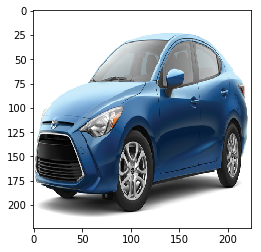

In [24]:
img_resized = img_resized.astype(np.float32)
plt.imshow(img_resized / 255)

In [25]:
sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

with tf.Session(config = sess_config) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess = sess, save_path = 'C:/Users/YISS/Desktop/Y_BIGTA/VISION_project/VGG_16/vgg_16.ckpt')

    score_ = sess.run(score, feed_dict = {X : img_resized.reshape(-1,224,224,3)})
    print(label_table.get(np.argmax(score_, axis = -1)[0]))

INFO:tensorflow:Restoring parameters from C:/Users/YISS/Desktop/Y_BIGTA/VISION_project/VGG_16/vgg_16.ckpt
sports car, sport car
